# Visualizing Image Embeddings

This notebook provides a way to visualize high-dimensional image embeddings using dimensionality reduction techniques like PCA and t-SNE.

### Load Embeddings and Metadata

In [6]:
import faiss
import numpy as np

# Load FAISS index and extract embeddings
index = faiss.read_index("../embeddings/image.index")

# Extract all vectors (reconstruct one by one)
embeddings = np.vstack([index.reconstruct(i) for i in range(index.ntotal)])

# Load metadata (paths to image files)
metadata = np.load("../embeddings/metadata.npy", allow_pickle=True)

### Reduce Dimensions (PCA + t-SNE)

In [7]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Reduce to 50 dimensions with PCA
pca = PCA(n_components=50)
pca_result = pca.fit_transform(embeddings)

# Further reduce to 2D with t-SNE
tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42)
tsne_result = tsne.fit_transform(pca_result)

### Plot with Thumbnails (Matplotlib)

Plotted 24975 images successfully.


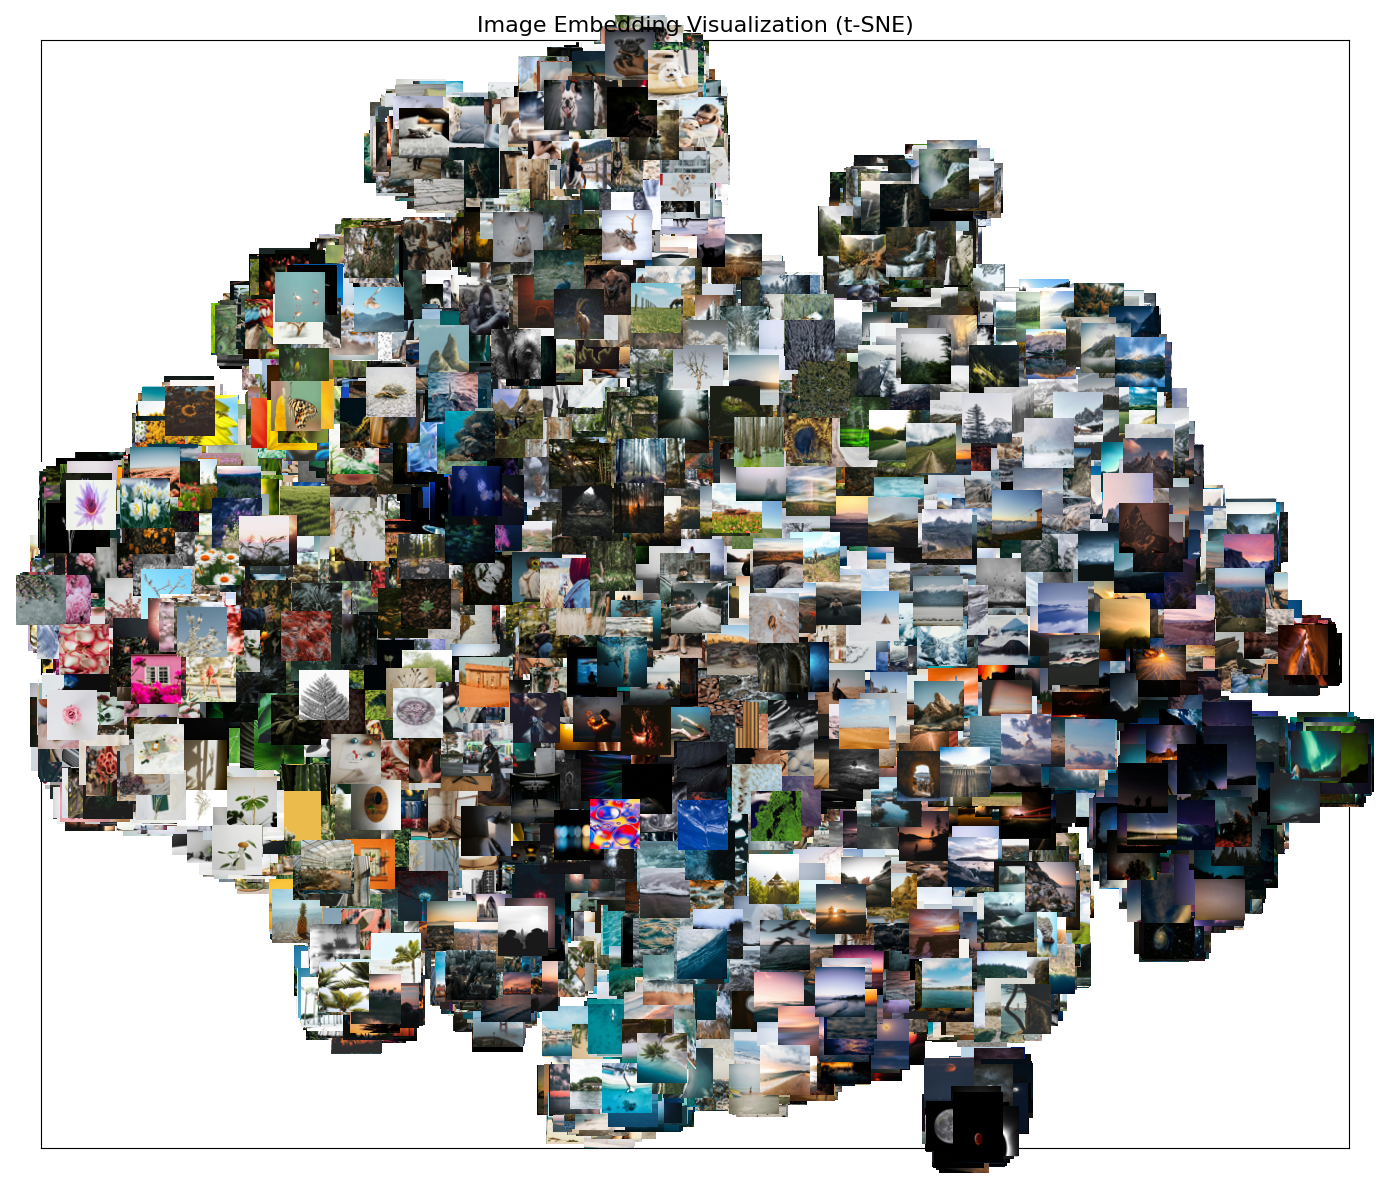

In [18]:
import matplotlib.pyplot as plt
from PIL import Image
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

# Scale t-SNE results to [0, 1] for plotting
min_vals = tsne_result.min(axis=0)
max_vals = tsne_result.max(axis=0)
scaled_tsne = (tsne_result - min_vals) / (max_vals - min_vals)

fig, ax = plt.subplots(figsize=(14, 12))
ax.set_title("Image Embedding Visualization (t-SNE)", fontsize=16)

added_images = 0
for xy, path in zip(scaled_tsne, metadata):
    try:
        path = "../data/" + path
        img = Image.open(path).resize((48, 48))  # Slightly larger thumbnails
        imagebox = OffsetImage(img, zoom=0.75)   # Adjust zoom for clarity
        ab = AnnotationBbox(imagebox, xy, frameon=False)
        ax.add_artist(ab)
        added_images += 1
    except Exception as e:
        # print(f"Error loading {path}: {e}")
        continue

print(f"Plotted {added_images} images successfully.")

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_xticks([])
ax.set_yticks([])
plt.tight_layout()
plt.show()

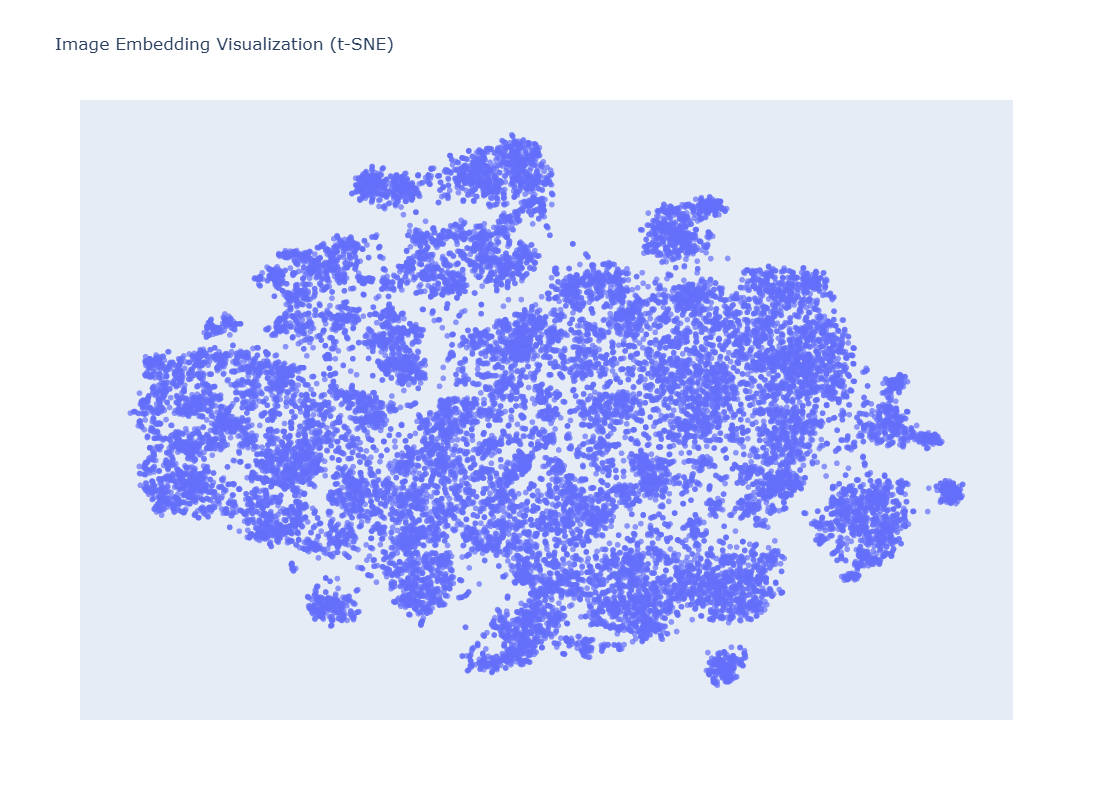

In [20]:
import plotly.express as px
import numpy as np
import os


# Extract file names (or labels) for hover info
labels = [os.path.basename(path) for path in metadata]

fig = px.scatter(
    x=scaled_tsne[:, 0],
    y=scaled_tsne[:, 1],
    hover_name=labels,
    title="Image Embedding Visualization (t-SNE)",
    width=1000,
    height=800
)

fig.update_traces(marker=dict(size=6, opacity=0.7))
fig.update_layout(xaxis_visible=False, yaxis_visible=False)
fig.show()

## Summary

- Loaded image embeddings and metadata.
- Applied PCA and t-SNE for dimensionality reduction.
- Visualized embeddings as image thumbnails in 2D space.